In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# path = "../data"
# Read the experimental data (cross-sectional)
lalonde_exp = pd.read_csv("lalonde_exp.csv")

# Read the observational data from PSID (cross-sectional)
lalonde_psid = pd.read_csv("lalonde_psid.csv")
lalonde_psid.insert(1, "y", lalonde_psid["re78"] - lalonde_psid["re75"])

Categorical variables: Race (Black, Hispanic),


<ipython-input-6-cf2ab4360f46>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  white = lalonde_psid[lalonde_psid["black"] == 0][lalonde_psid["hispanic"] == 0]


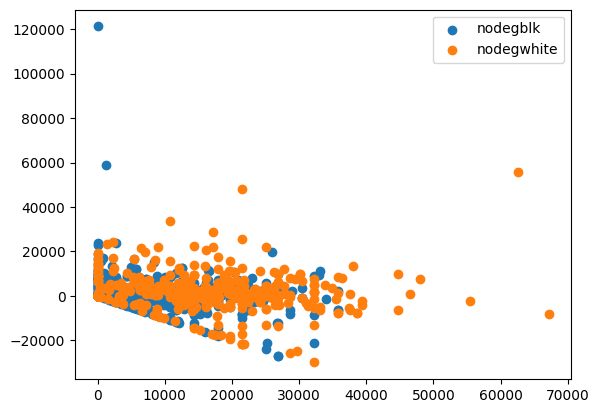

In [ ]:
black = lalonde_psid[lalonde_psid["black"] == 1]
hisp = lalonde_psid[lalonde_psid["hispanic"] == 1]
white = lalonde_psid[lalonde_psid["black"] == 0][lalonde_psid["hispanic"] == 0]
plt.scatter(
    black[black["nodegree"] == 1]["re75"],
    black["y"][black["nodegree"] == 1],
    label="nodegblk",
)
plt.scatter(
    white[white["nodegree"] == 1]["re75"],
    white["y"][white["nodegree"] == 1],
    label="nodegwhite",
)
plt.legend()
plt.show()
# plt.scatter(lalonde_psid[lalonde_psid["nodegree"] == 0]["age"], lalonde_psid["y"][lalonde_psid["nodegree"] == 0], label="deg")

# plt.scatter(hisp["re75"], hisp["re78"], label="hisp")
# plt.scatter(white["re75"], white["re78"], label="white")

# lalonde_psid[lalonde_psid["black"] == 1].describe()

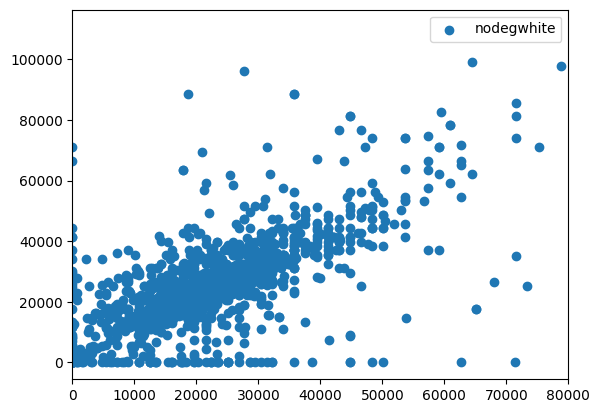

In [ ]:
plt.scatter(
    white[white["nodegree"] == 0]["re75"],
    white["re78"][white["nodegree"] == 0],
    label="nodegwhite",
)
plt.xlim(0, 80000)

plt.legend()
plt.show()

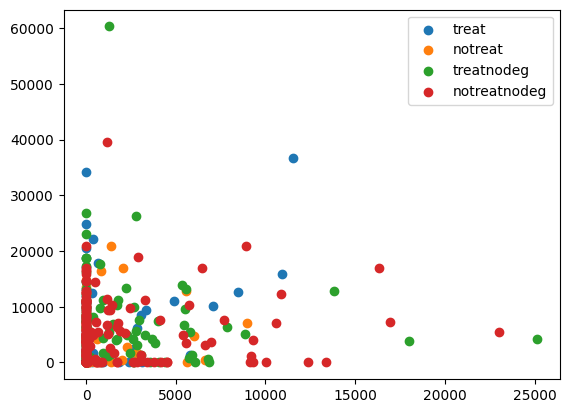

In [ ]:
df = lalonde_exp[lalonde_exp["nodegree"] == 0]
plt.scatter(df["re75"][df["treat"] == 1], df[df["treat"] == 1]["re78"], label="treat")
plt.scatter(df["re75"][df["treat"] == 0], df[df["treat"] == 0]["re78"], label="notreat")

df1 = lalonde_exp[lalonde_exp["nodegree"] == 1]
plt.scatter(
    df1["re75"][df1["treat"] == 1], df1[df1["treat"] == 1]["re78"], label="treatnodeg"
)
plt.scatter(
    df1["re75"][df1["treat"] == 0], df1[df1["treat"] == 0]["re78"], label="notreatnodeg"
)
plt.legend()
plt.show()

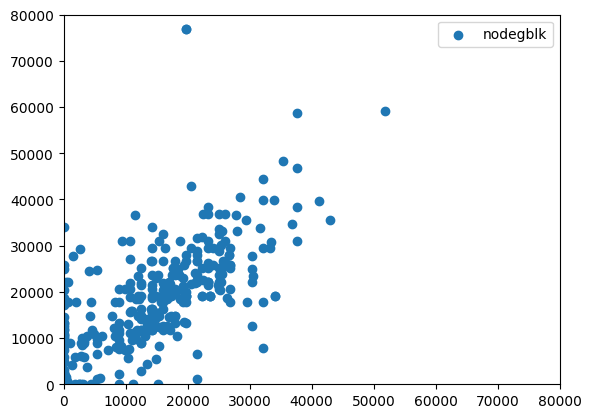

In [ ]:
plt.scatter(
    black[black["nodegree"] == 0]["re75"],
    black["re78"][black["nodegree"] == 0],
    label="nodegblk",
)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.legend()
plt.show()

In [ ]:
lalonde_exp.insert(1, "y", lalonde_exp["re78"] - lalonde_exp["re75"])

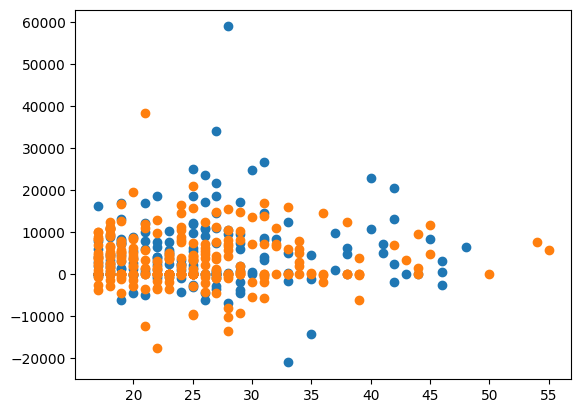

In [ ]:
plt.scatter(
    lalonde_exp["age"][lalonde_exp["treat"] == 1],
    lalonde_exp[lalonde_exp["treat"] == 1]["y"],
)
plt.scatter(
    lalonde_exp["age"][lalonde_exp["treat"] == 0],
    lalonde_exp[lalonde_exp["treat"] == 0]["y"],
)

In [ ]:
lalonde_psid

,age,y,education,black,hispanic,married,nodegree,re74,re75,re78,u74,u75,treat,id
0,37,9930.050000,11,1,0,1,1,0.000000,0.000000,9930.050000,1,1,1,1
1,22,3595.890000,9,0,1,0,1,0.000000,0.000000,3595.890000,1,1,1,2
2,30,24909.500000,12,1,0,0,0,0.000000,0.000000,24909.500000,1,1,1,3
3,27,7506.150000,11,1,0,0,1,0.000000,0.000000,7506.150000,1,1,1,4
4,33,289.790000,8,1,0,0,1,0.000000,0.000000,289.790000,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,47,4731.566406,8,0,0,1,1,44667.363281,33837.097656,38568.664062,0,0,0,2486
2671,32,-8028.031250,8,0,0,1,1,47022.402344,67137.093750,59109.062500,0,0,0,2487
2672,47,7742.179688,10,0,0,1,1,48197.964844,47968.113281,55710.292969,0,0,0,2488
2673,54,-23680.570312,0,0,1,1,1,49228.539062,44220.968750,20540.398438,0,0,0,2489


In [ ]:
import numpy as np
import pandas as pd

# Assuming lalonde_psid is your existing DataFrame with the treatment group removed
# lalonde_psid = lalonde_psid[lalonde_psid["treat"] == 0]

def marriage_prob(x):
    return 0.9 * (1 - np.exp(-0.25 * (x - 16)))

# Define function to calculate means and covariances for each group
def compute_group_stats(df, group_vars, re_vars):
    group_stats = {}
    grouped = df.groupby(group_vars)
    for group, data in grouped:
        means = data[re_vars].mean().values
        cov = data[re_vars].cov().values
        group_stats[group] = (means, cov)
    return group_stats

re_vars = ["age", "education", "re74", "re75", "re78"]
group_vars = ["black", "hispanic", "nodegree"]
group_stats = compute_group_stats(lalonde_psid, group_vars, re_vars)

proportions = lalonde_psid[["black", "hispanic", "nodegree"]].mean()
prob_black = proportions["black"]
prob_hispanic = proportions["hispanic"]
prob_white = 1 - prob_black - prob_hispanic

# Calculate the probability of nodegree for each ethnicity
prob_nodegree_black = lalonde_psid[lalonde_psid["black"] == 1]["nodegree"].mean()
prob_nodegree_hispanic = lalonde_psid[lalonde_psid["hispanic"] == 1]["nodegree"].mean()
prob_nodegree_white = lalonde_psid[
    (lalonde_psid["black"] == 0) & (lalonde_psid["hispanic"] == 0)
]["nodegree"].mean()

# Step 3: Generate Synthetic Data
def generate_synthetic_data(
    n,
    prob_black,
    prob_hispanic,
    prob_white,
    prob_nodegree_black,
    prob_nodegree_hispanic,
    prob_nodegree_white,
    group_stats,
):
    data = []

    while len(data) < n:
        ethnicity = np.random.choice(
            ["black", "hispanic", "white"], p=[prob_black, prob_hispanic, prob_white]
        )

        black = int(ethnicity == "black")
        hispanic = int(ethnicity == "hispanic")

        # Generate nodegree based on ethnicity
        if black:
            nodegree = np.random.binomial(1, prob_nodegree_black)
        elif hispanic:
            nodegree = np.random.binomial(1, prob_nodegree_hispanic)
        else:
            nodegree = np.random.binomial(1, prob_nodegree_white)

        p = 0.25 + nodegree * 0.25 + black * 0.25
        treat = np.random.binomial(1, p)

        # Generate multivariate normal data
        group = (black, hispanic, nodegree)
        means, cov = group_stats[group]
        sample = np.random.multivariate_normal(means, cov)

        age = sample[0].round().astype(int)

        if age < 16:
            continue

        education = sample[1].round().astype(int)
        if education < 0:
            education = 0

        # Generate married based on age using the fitted saturating exponential function
        p_married = marriage_prob(age)
        married = np.random.binomial(1, p_married)

        re74, re75, re78 = np.clip(sample[2:], 0, None)

        # Adjust re78 with the treatment effect if treated
        re78 += treat * np.random.normal(5000, 500)

        # Append valid data
        data.append([black, hispanic, married, nodegree, treat, age, education, re74, re75, re78])

    # Create DataFrame from valid data
    synthetic_data = pd.DataFrame(
        data,
        columns=[
            "black",
            "hispanic",
            "married",
            "nodegree",
            "treat",
            "age",
            "education",
            "re74",
            "re75",
            "re78",
        ],
    )

    return synthetic_data

synthetic_data = generate_synthetic_data(
    1000,
    prob_black,
    prob_hispanic,
    prob_white,
    prob_nodegree_black,
    prob_nodegree_hispanic,
    prob_nodegree_white,
    group_stats,
)

synthetic_data.describe()

,black,hispanic,married,nodegree,treat,age,education,re74,re75,re78
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.258000,0.03400,0.851000,0.325000,0.397000,35.841000,12.072000,20483.746748,20147.123164,24059.624031
std,0.437753,0.18132,0.356267,0.468609,0.489521,9.921197,3.187315,13265.685757,13168.246507,14821.479680
min,0.000000,0.00000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,1.000000,0.000000,0.000000,28.750000,10.000000,11104.906268,10463.277008,12722.491284
50%,0.000000,0.00000,1.000000,0.000000,0.000000,35.000000,13.000000,19457.278081,18856.135816,23180.981065
75%,1.000000,0.00000,1.000000,1.000000,1.000000,42.000000,14.000000,28720.831008,29186.723304,34271.451824
max,1.000000,1.00000,1.000000,1.000000,1.000000,71.000000,20.000000,65829.364941,63052.238161,83984.569307


In [ ]:
synthetic_data

,black,hispanic,married,nodegree,treat,age,education,re74,re75,re78
0,1,0,1,0,0,39,14,13583.615481,11690.588671,24959.305735
1,0,1,1,0,0,38,14,6846.138441,13850.873430,32256.746934
2,0,0,1,0,0,42,15,7417.470832,0.000000,0.000000
3,0,0,1,0,0,33,15,12809.284766,15105.876300,3955.904669
4,0,0,1,0,0,44,15,41901.461505,39739.359990,50124.569791
...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,1,1,57,8,4713.573890,5366.297784,14576.621464
996,1,0,1,1,1,49,8,24824.008820,22506.765961,30371.066527
997,0,0,1,0,0,41,19,21942.765982,35343.817668,34485.787123
998,0,0,1,1,0,55,9,22584.643178,30541.103305,34765.317515


In [ ]:
synthetic_data.to_csv("synthetic_observed.csv", index=False)

In [ ]:
import numpy as np
import pandas as pd

# Assuming lalonde_psid is your existing DataFrame with the treatment group removed
# lalonde_psid = lalonde_psid[lalonde_psid["treat"] == 0]

lalonde_psid = lalonde_exp[lalonde_exp["treat"] == 0]

def marriage_prob(x):
    return 0.9 * (1 - np.exp(-0.25 * (x - 16)))

# Define function to calculate means and covariances for each group
def compute_group_stats(df, group_vars, re_vars):
    group_stats = {}
    grouped = df.groupby(group_vars)
    for group, data in grouped:
        means = data[re_vars].mean().values
        cov = data[re_vars].cov().values
        group_stats[group] = (means, cov)
    return group_stats

re_vars = ["age", "education", "re74", "re75", "re78"]
group_vars = ["black", "hispanic", "nodegree"]
group_stats = compute_group_stats(lalonde_psid, group_vars, re_vars)

proportions = lalonde_psid[["black", "hispanic", "nodegree"]].mean()
prob_black = proportions["black"]
prob_hispanic = proportions["hispanic"]
prob_white = 1 - prob_black - prob_hispanic

# Calculate the probability of nodegree for each ethnicity
prob_nodegree_black = lalonde_psid[lalonde_psid["black"] == 1]["nodegree"].mean()
prob_nodegree_hispanic = lalonde_psid[lalonde_psid["hispanic"] == 1]["nodegree"].mean()
prob_nodegree_white = lalonde_psid[
    (lalonde_psid["black"] == 0) & (lalonde_psid["hispanic"] == 0)
]["nodegree"].mean()

# Step 3: Generate Synthetic Data
def generate_synthetic_data(
    n,
    prob_black,
    prob_hispanic,
    prob_white,
    prob_nodegree_black,
    prob_nodegree_hispanic,
    prob_nodegree_white,
    group_stats,
):
    data = []

    while len(data) < n:
        ethnicity = np.random.choice(
            ["black", "hispanic", "white"], p=[prob_black, prob_hispanic, prob_white]
        )

        black = int(ethnicity == "black")
        hispanic = int(ethnicity == "hispanic")

        # Generate nodegree based on ethnicity
        if black:
            nodegree = np.random.binomial(1, prob_nodegree_black)
        elif hispanic:
            nodegree = np.random.binomial(1, prob_nodegree_hispanic)
        else:
            nodegree = np.random.binomial(1, prob_nodegree_white)

        p = 0.25 + nodegree * 0.25 + black * 0.25
        treat = np.random.binomial(1, p)

        # Generate multivariate normal data
        group = (black, hispanic, nodegree)
        means, cov = group_stats[group]
        sample = np.random.multivariate_normal(means, cov)

        age = sample[0].round().astype(int)

        if age < 16:
            continue

        education = sample[1].round().astype(int)
        if education < 0:
            education = 0

        # Generate married based on age using the fitted saturating exponential function
        p_married = marriage_prob(age)
        married = np.random.binomial(1, p_married)

        re74, re75, re78 = np.clip(sample[2:], 0, None)

        # Adjust re78 with the treatment effect if treated
        re78 += treat * np.random.normal(5000, 500)

        # Append valid data
        data.append([black, hispanic, married, nodegree, treat, age, education, re74, re75, re78])

    # Create DataFrame from valid data
    synthetic_data = pd.DataFrame(
        data,
        columns=[
            "black",
            "hispanic",
            "married",
            "nodegree",
            "treat",
            "age",
            "education",
            "re74",
            "re75",
            "re78",
        ],
    )

    return synthetic_data

synthetic_data = generate_synthetic_data(
    1000,
    prob_black,
    prob_hispanic,
    prob_white,
    prob_nodegree_black,
    prob_nodegree_hispanic,
    prob_nodegree_white,
    group_stats,
)

synthetic_data.describe()

,black,hispanic,married,nodegree,treat,age,education,re74,re75,re78
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.821000,0.090000,0.741000,0.815000,0.669000,26.420000,10.101000,3225.296839,1763.394680,8558.531961
std,0.383544,0.286325,0.438305,0.388492,0.470809,6.064188,1.572027,3973.099065,2321.073853,5041.751935
min,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,5.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,22.000000,9.000000,0.000000,0.000000,5059.322509
50%,1.000000,0.000000,1.000000,1.000000,1.000000,26.000000,10.000000,1699.567122,860.574463,7827.706999
75%,1.000000,0.000000,1.000000,1.000000,1.000000,30.000000,11.000000,5355.658226,2826.090392,11734.508747
max,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,13.000000,21795.107455,17597.811411,31191.612711


In [ ]:
synthetic_data.to_csv("synthetic_exp.csv", index=False)

In [ ]:
diff(
    synthetic_data[synthetic_data["married"] == 1][synthetic_data["black"] == 1][
        synthetic_data["hispanic"] == 0
    ][synthetic_data["nodegree"] == 1]
)

NameError: name 'diff' is not defined

In [ ]:
lalonde_psid[lalonde_psid["black"] == 0][lalonde_psid["hispanic"] == 0][
    lalonde_psid["married"] == 1
][lalonde_psid["nodegree"] == 1]

<ipython-input-13-22b17eef343b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lalonde_psid[lalonde_psid["black"] == 0][lalonde_psid["hispanic"] == 0][
<ipython-input-13-22b17eef343b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lalonde_psid[lalonde_psid["black"] == 0][lalonde_psid["hispanic"] == 0][
<ipython-input-13-22b17eef343b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lalonde_psid[lalonde_psid["black"] == 0][lalonde_psid["hispanic"] == 0][


,age,y,education,black,hispanic,married,nodegree,re74,re75,re78,u74,u75,treat,id
1923,53,0.000000,6,0,0,1,1,0.000000,0.000000,0.000000,1,1,0,1739
1929,55,0.000000,8,0,0,1,1,0.000000,0.000000,0.000000,1,1,0,1745
1931,41,0.000000,8,0,0,1,1,0.000000,0.000000,0.000000,1,1,0,1747
1932,45,0.000000,8,0,0,1,1,0.000000,0.000000,0.000000,1,1,0,1748
1935,48,0.000000,9,0,0,1,1,0.000000,0.000000,0.000000,1,1,0,1751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,32,-2443.933594,10,0,0,1,1,43103.871094,39387.097656,36943.164062,0,0,0,2485
2670,47,4731.566406,8,0,0,1,1,44667.363281,33837.097656,38568.664062,0,0,0,2486
2671,32,-8028.031250,8,0,0,1,1,47022.402344,67137.093750,59109.062500,0,0,0,2487
2672,47,7742.179688,10,0,0,1,1,48197.964844,47968.113281,55710.292969,0,0,0,2488


In [ ]:
synthetic_data[synthetic_data["black"] == 0][synthetic_data["hispanic"] == 0][
    synthetic_data["married"] == 1
][synthetic_data["nodegree"] == 1]

<ipython-input-14-100bd738a977>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  synthetic_data[synthetic_data["black"] == 0][synthetic_data["hispanic"] == 0][
<ipython-input-14-100bd738a977>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  synthetic_data[synthetic_data["black"] == 0][synthetic_data["hispanic"] == 0][
<ipython-input-14-100bd738a977>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  synthetic_data[synthetic_data["black"] == 0][synthetic_data["hispanic"] == 0][


,black,hispanic,married,nodegree,treat,age,re74,re75,re78
8,0,0,1,1,0,55,34905.505874,29005.497770,32302.839982
12,0,0,1,1,1,38,16697.687089,25230.947764,41091.685429
15,0,0,1,1,1,44,1886.727204,10403.383355,21919.240873
16,0,0,1,1,0,41,19567.501492,27971.978788,30466.098078
23,0,0,1,1,1,63,16318.407127,9950.313164,15200.037954
...,...,...,...,...,...,...,...,...,...
980,0,0,1,1,0,69,17398.253583,8853.485456,0.000000
987,0,0,1,1,1,40,26972.262840,41737.790225,40931.386774
989,0,0,1,1,1,27,30797.465797,21433.288932,26361.895696
991,0,0,1,1,0,32,3021.938966,15091.680123,13615.236948


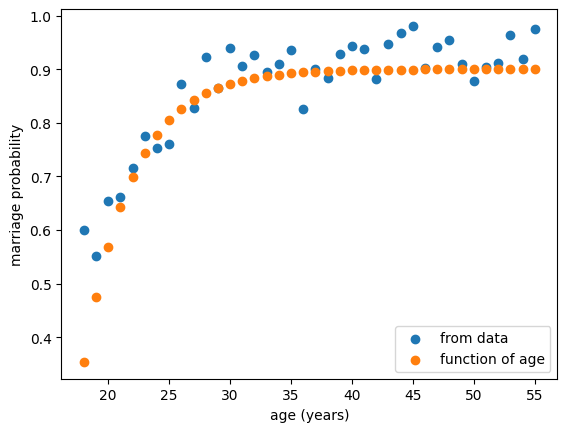

In [ ]:
adf = lalonde_psid.groupby("age")[["married"]].mean().reset_index()
plt.scatter(adf["age"], adf["married"], label="from data")
plt.scatter(adf["age"], marriage_prob(adf["age"]), label="function of age")
plt.legend()
plt.xlabel("age (years)")
plt.ylabel("marriage probability")
plt.show()

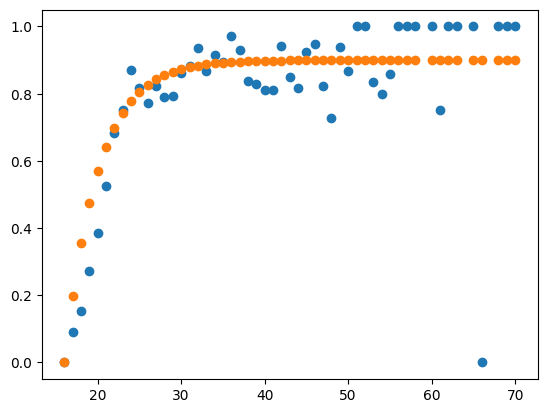

In [ ]:
adf = synthetic_data.groupby("age")[["married"]].mean().reset_index()
plt.scatter(adf["age"], adf["married"])
plt.scatter(adf["age"], marriage_prob(adf["age"]))
plt.show()

In [ ]:
lalonde_psid[
    ["black", "hispanic", "married", "nodegree", "treat", "age", "re74", "re75", "re78"]
].describe()

,black,hispanic,married,nodegree,treat,age,re74,re75,re78
count,2490.000000,2490.000000,2490.000000,2490.000000,2490.0,2490.000000,2490.000000,2490.000000,2490.000000
mean,0.250602,0.032530,0.866265,0.305221,0.0,34.850602,19428.745805,19063.337668,21553.920924
std,0.433447,0.177439,0.340436,0.460593,0.0,10.440757,13406.877171,13596.954865,15555.345539
min,0.000000,0.000000,0.000000,0.000000,0.0,18.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.0,26.000000,10775.966797,9846.774414,11526.266602
50%,0.000000,0.000000,1.000000,0.000000,0.0,33.000000,18417.107422,17903.226562,20688.171875
75%,1.000000,0.000000,1.000000,1.000000,0.0,44.000000,26450.101562,26496.773438,29554.531250
max,1.000000,1.000000,1.000000,1.000000,0.0,55.000000,137148.687500,156653.234375,121173.578125


In [ ]:
df = pd.read_csv('synthetic.csv')

In [ ]:
df

,black,hispanic,married,nodegree,treat,age,re74,re75,re78
0,0,0,1,0,0,31,34516.368291,26032.269262,15424.806466
1,0,1,1,0,1,22,13946.986866,15220.719790,40969.144616
2,0,0,1,0,0,44,12583.026352,21440.247086,40830.041680
3,0,0,1,0,1,28,0.000000,0.000000,4983.051381
4,1,0,1,0,1,29,5508.476173,0.000000,18345.670200
...,...,...,...,...,...,...,...,...,...
995,1,0,1,0,0,32,25671.579065,21410.089118,32638.914479
996,1,0,1,0,0,27,14385.159652,4768.112011,11233.291525
997,0,0,1,0,1,22,11406.028056,30591.873263,40323.401368
998,1,0,0,1,0,41,8506.892347,6495.171036,2292.153260
